In [1]:
#View Count Visionary: A Data-Driven Approach To Forecasting YouTube Video Views.

import numpy as np 
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/youtube-adview-dataset/train.csv
/kaggle/input/youtube-adview-dataset/test.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("../input/youtube-adview-dataset/train.csv")

In [4]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [5]:
df.shape

(14999, 9)

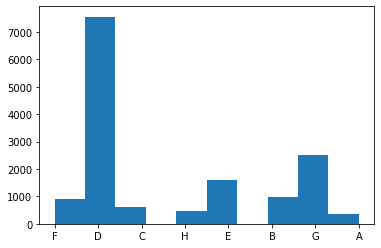

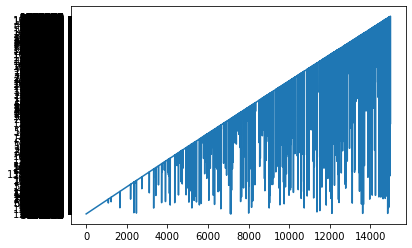

In [6]:
# Visualization
# Individual Plots
plt.hist(df["category"])
plt.show()
plt.plot(df["views"])
plt.show()

In [7]:
df.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [8]:
category={'A': 1,'B': 2,'C': 3,'D': 4,'E': 5,'F': 6,'G': 7,'H': 8,}
df["category"]=df["category"].map(category)
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [9]:
df=df[df.views!='F']
df=df[df.likes!='F']
df=df[df.dislikes!='F']
df=df[df.comment!='F']

In [10]:
df["views"]=pd.to_numeric(df["views"])
df["comment"]=pd.to_numeric(df["comment"])
df["likes"]=pd.to_numeric(df["likes"])
df["dislikes"]=pd.to_numeric(df["dislikes"])
df["adview"]=pd.to_numeric(df["adview"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14637 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14637 non-null  object
 1   adview     14637 non-null  int64 
 2   views      14637 non-null  int64 
 3   likes      14637 non-null  int64 
 4   dislikes   14637 non-null  int64 
 5   comment    14637 non-null  int64 
 6   published  14637 non-null  object
 7   duration   14637 non-null  object
 8   category   14637 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.1+ MB


In [12]:
column_vidid=df['vidid']

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
df['duration']=LabelEncoder().fit_transform(df['duration'])
df['vidid']=LabelEncoder().fit_transform(df['vidid'])
df['published']=LabelEncoder().fit_transform(df['published'])

In [15]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [16]:
import datetime
import time

In [17]:
def checki(x):
  y=x[2:]
  h=''
  m=''
  s=''
  mm=''
  p= ['H','M','S']
  for i in y:
    if i not in p:
      mm+=i
    else:
      if(i=="H"):
        h=mm
        mm=''
      elif(i=="M"):
        m=mm
        mm=''
      else:
        s=mm
        mm=''
  if(h==''):
    h='00'
  if(m==''):
    m='00'
  if(s==''):
    m='00'
  bp = h+':'+m+':'+s
  return bp
train = pd.read_csv("../input/youtube-adview-dataset/train.csv")
mp=pd.read_csv("../input/youtube-adview-dataset/train.csv")["duration"]
time=mp.apply(checki)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14637 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   vidid      14637 non-null  int64
 1   adview     14637 non-null  int64
 2   views      14637 non-null  int64
 3   likes      14637 non-null  int64
 4   dislikes   14637 non-null  int64
 5   comment    14637 non-null  int64
 6   published  14637 non-null  int64
 7   duration   14637 non-null  int64
 8   category   14637 non-null  int64
dtypes: int64(9)
memory usage: 1.1 MB


In [19]:
def func_sec(time_string):
  h , m, s=time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

  time1=time.apply(func_sec)
  df["duration"]=time1
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [20]:
# Split Data
Y_train = pd.DataFrame(data = df.iloc[:, 1].values, columns = ['target'])
df=df.drop(["adview"],axis=1)
df=df.drop(["vidid"],axis=1)
df.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, Y_train, test_size=0.2, random_state=42)

X_train.shape



(11709, 7)

In [21]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

X_train.mean()

0.25583174881891707

In [22]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


In [23]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 5288.146964612727
Mean Squared Error: 10881576714.292877
Root Mean Squared Error: 104314.7962385628


In [24]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, supportvector_regressor)

Mean Absolute Error: 3478.055764043397
Mean Squared Error: 10901273757.728346
Root Mean Squared Error: 104409.16510406711


In [25]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 3810.281079234973
Mean Squared Error: 10539357166.888319
Root Mean Squared Error: 102661.37134720304


In [26]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 4903.729272255531
Mean Squared Error: 10158691842.292942
Root Mean Squared Error: 100790.33605605719


In [27]:
# Artificial Neural Network
from tensorflow import keras
from keras.layers import Dense

In [28]:
ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                                ])

optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)

print_error(X_test,y_test,ann)


User settings:

   KMP_AFFINITY=granularity=fine,noverbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER

Epoch 1/100
366/366 [==============================] - 1s 2ms/step - loss: 767617728.0000 - mean_squared_error: 767617728.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 767603328.0000 - mean_squared_error: 767603328.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 767573632.0000 - mean_squared_error: 767573632.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 767523072.0000 - mean_squared_error: 767523072.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 767447104.0000 - mean_squared_error: 767447104.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767350400.0000 - mean_squared_error: 767350400.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 767227264.0000 - mean_squared_error: 767227264.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 767071424.0000 - mean_squared_error:

In [29]:
#Saving Scikitlearn models
import joblib
joblib.dump(supportvector_regressor, "SVR_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

In [30]:
dft = pd.read_csv("../input/youtube-adview-dataset/test.csv")

In [31]:
dft.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [32]:
from keras.models import load_model
model = load_model("ann_youtubeadview.h5")

In [33]:
# Removing character "F" present in data
dft=dft[dft.views!='F']
dft=dft[dft.likes!='F']
dft=dft[dft.dislikes!='F']
dft=dft[dft.comment!='F']

In [34]:
dft.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [35]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
dft["category"]=dft["category"].map(category)
dft.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [36]:
# Convert values to integers for views, likes, comments, dislikes and adview
dft["views"] = pd.to_numeric(dft["views"])
dft["comment"] = pd.to_numeric(dft["comment"])
dft["likes"] = pd.to_numeric(dft["likes"])
dft["dislikes"] = pd.to_numeric(dft["dislikes"])
column_vidid=dft['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
dft['duration']=LabelEncoder().fit_transform(dft['duration'])
dft['vidid']=LabelEncoder().fit_transform(dft['vidid'])
dft['published']=LabelEncoder().fit_transform(dft['published'])
dft.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [37]:
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv("../input/youtube-adview-dataset/test.csv")
mp = pd.read_csv("../input/youtube-adview-dataset/test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
  h, m, s = time_string.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

dft["duration"]=time1
dft.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [38]:
dft=dft.drop(["vidid"],axis=1)
dft.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = dft
X_test=scaler.fit_transform(X_test)

In [40]:
prediction = model.predict(X_test)

In [41]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float32
dtypes: float32(1)
memory usage: 33.5 KB


In [42]:
prediction = prediction.rename(columns={0: "views"})

In [43]:
prediction.head()

,views
0,2132.717041
1,2176.770020
2,1062.740967
3,2.245073
4,2025.565552


In [44]:
prediction.to_csv('predictions.csv')